In [15]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
#Importing the dataset using pandas
url = "https://raw.githubusercontent.com/Epoch-IITH/2022---2023/main/Core%20Selection%20Hackathon/Epoch%20Hackathon%20-%20Dataset.csv"
dataset = pd.read_csv(url)
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,k_value,l_value,m_value,percentage_free_sulphur,n_value
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,8.10,4.05,0.636,30.909091,0.6080
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,8.68,4.34,0.778,26.800000,0.8290
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,8.56,4.28,0.742,36.000000,0.7440
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,11.48,5.74,0.655,35.294118,0.7195
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,8.10,4.05,0.636,30.909091,0.6080


<AxesSubplot:>

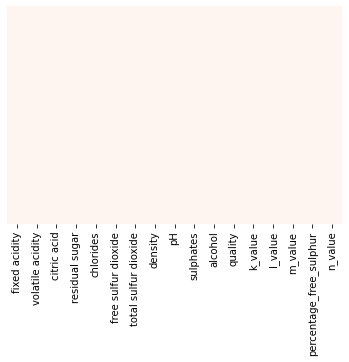

In [17]:
#check for missing values
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap="Reds")

In [18]:
#statistical summary of the dataset
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,k_value,l_value,m_value,percentage_free_sulphur,n_value
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.534709,8.847458,4.423729,0.745615,32.421241,0.859570
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.498950,1.704047,0.852023,0.192020,22.016181,0.432661
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000,5.120000,2.560000,0.388000,11.666667,0.368500
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000,7.680000,3.840000,0.631000,20.625000,0.657750
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000,8.445000,4.222500,0.702000,26.666667,0.754000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000,9.740000,4.870000,0.815000,38.571429,0.893750
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000,16.285000,8.142500,2.610000,440.000000,4.801000


<AxesSubplot:xlabel='fixed acidity', ylabel='quality'>

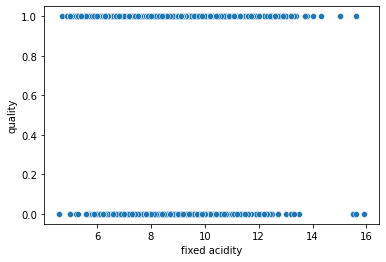

In [19]:
sns.scatterplot(data = dataset, x = 'fixed acidity', y = 'quality')

<AxesSubplot:xlabel='volatile acidity', ylabel='quality'>

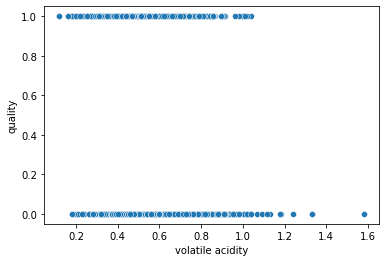

In [20]:
sns.scatterplot(data = dataset, x = 'volatile acidity', y = 'quality')

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='quality'>

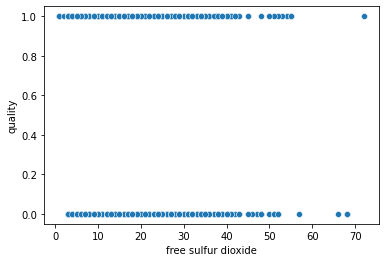

In [21]:
sns.scatterplot(data = dataset, x = 'free sulfur dioxide', y = 'quality')

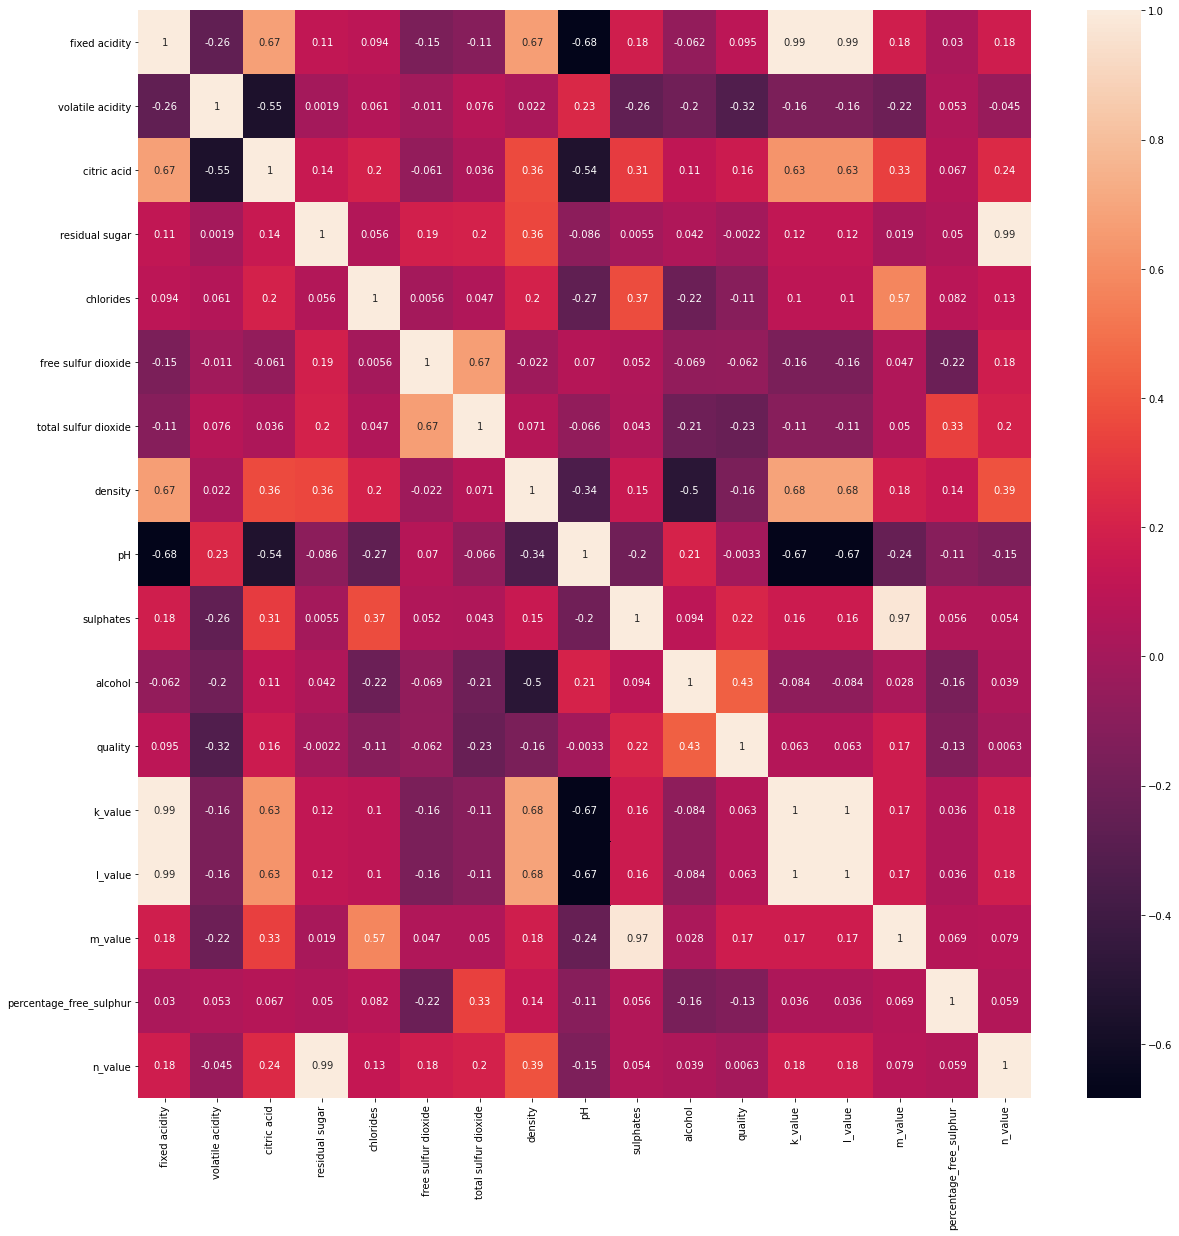

In [14]:
plt.figure(figsize = (20,20))
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [32]:
# Create train and test data
X = dataset.drop(columns = ['quality'])
y = dataset[['quality']]

In [38]:
X = np.array(X).astype('float32')
y = np.array(y)

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 200)

In [85]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [86]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

c:\Users\DSN Santosh\NPTEL\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [87]:
y_pred = log.predict(X_test)

In [88]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred)

array([[152,  44],
       [ 47, 157]], dtype=int64)

In [89]:
accuracy_score(y_test,y_pred)

0.7725

# THE END